In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc






In [3]:
if platform.system() == 'Darwin':
    ro('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
else: 
    print("Unknown System..")
%matplotlib inline

In [4]:
# tsv : tab seperated value (탭으로 구분된 값)
df = pd.read_csv('./data/2016crime.tsv',delimiter='\t',index_col='자치구')
# print(df.head(10))    # 10개

df['살인검거율'] = df['살인(검거)'] / df['살인(발생)'] * 100
df['강도검거율'] = df['강도(검거)'] / df['강도(발생)'] * 100
df['강간강제추행검거율'] = df['강간강제추행(검거)'] / df['강간강제추행(발생)'] * 100
df['절도검거율'] = df['절도(검거)'] / df['절도(발생)'] * 100
df['폭력검거율'] = df['폭력(검거)'] / df['폭력(발생)'] * 100
df['합계검거율'] = df['합계(검거)'] / df['합계(발생)'] * 100
print(df.head())    # 5개

     합계(발생)  합계(검거)  살인(발생)  살인(검거)  강도(발생)  강도(검거)  강간강제추행(발생)  강간강제추행(검거)  \
자치구                                                                           
종로구    4459    4298       6       5      12      14         238        1106   
중구     4584    3068       3       3       8       7         198         148   
용산구    4137    2835       4       4       9      10         251         214   
성동구    3026    2392       4       5       3       5         104          78   
광진구    5322    3312       4       4      11       6         279         234   

     절도(발생)  절도(검거)  폭력(발생)  폭력(검거)       살인검거율       강도검거율   강간강제추행검거율  \
자치구                                                                       
종로구    1940    1020    2263    2153   83.333333  116.666667  464.705882   
중구     2150     914    2225    1996  100.000000   87.500000   74.747475   
용산구    1489     599    2384    2008  100.000000  111.111111   85.258964   
성동구    1296     896    1619    1408  125.000000  166.666667   75.000000

In [5]:
del df['살인(검거)']
del df['강도(검거)']
del df['강간강제추행(검거)']
del df['절도(검거)']
del df['폭력(검거)']
del df['합계(검거)']

In [6]:

print(df.shape)
print(df.head(25))

cals = ['살인검거율','강도검거율','강간강제추행검거율','절도검거율','폭력검거율','합계검거율']

(25, 12)
      합계(발생)  살인(발생)  강도(발생)  강간강제추행(발생)  절도(발생)  폭력(발생)       살인검거율  \
자치구                                                                    
종로구     4459       6      12         238    1940    2263   83.333333   
중구      4584       3       8         198    2150    2225  100.000000   
용산구     4137       4       9         251    1489    2384  100.000000   
성동구     3026       4       3         104    1296    1619  125.000000   
광진구     5322       4      11         279    2636    2392  100.000000   
동대문구    4787       5      10         190    1940    2642  100.000000   
중랑구     5041       8      14         164    1691    3164   87.500000   
성북구     3744       4       8         154    1470    2108   75.000000   
강북구     4229       7       5         217    1222    2778   85.714286   
도봉구     2438       3       5         123     866    1441  100.000000   
노원구     4543       5       6         159    1857    2516  120.000000   
은평구     4501       6       9         156    1666    266

In [7]:
df.loc[df['살인검거율']>100,'살인검거율'] = 100 #살인 검거율이 100퍼센트가 넘는거는 100으로 고정
df.loc[df['강도검거율']>100,'강도검거율'] = 100 
df.loc[df['강간강제추행검거율']>100,'강간강제추행검거율'] = 100 
df.loc[df['절도검거율']>100,'절도검거율'] = 100 
df.loc[df['폭력검거율']>100,'폭력검거율'] = 100 
df.loc[df['합계검거율']>100,'합계검거율'] = 100 

In [8]:
df = df.rename(columns={"살인(발생)":"살인","강도(발생)":"강도",
                   "강간강제추행(발생)":"강간","절도(발생)":"절도","폭력(발생)":"폭력"})

In [9]:
del df['합계(발생)']

In [10]:
df

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,합계검거율
자치구,,,,,,,,,,,
종로구,6,12,238,1940,2263,83.333333,100.000000,100.000000,52.577320,95.139196,96.389325
중구,3,8,198,2150,2225,100.000000,87.500000,74.747475,42.511628,89.707865,66.928447
용산구,4,9,251,1489,2384,100.000000,100.000000,85.258964,40.228341,84.228188,68.527919
성동구,4,3,104,1296,1619,100.000000,100.000000,75.000000,69.135802,86.967264,79.048249
광진구,4,11,279,2636,2392,100.000000,54.545455,83.870968,40.098634,84.071906,62.232244
동대문구,5,10,190,1940,2642,100.000000,100.000000,83.157895,55.206186,89.969720,75.684145
중랑구,8,14,164,1691,3164,87.500000,100.000000,91.463415,62.211709,85.714286,78.059909
성북구,4,8,154,1470,2108,75.000000,100.000000,75.974026,49.319728,86.290323,71.367521
강북구,7,5,217,1222,2778,85.714286,80.000000,73.271889,54.991817,89.344852,78.576496


In [11]:
popDF = pd.read_csv('./data/2016_seoul_pop.csv',index_col="자치구")

In [12]:
popDF

,인구수
자치구,
종로구,161922
중구,134409
용산구,245102
성동구,307161
광진구,372104
동대문구,370312
중랑구,415677
성북구,461617
강북구,330704


In [13]:
df = df.join(popDF)

In [14]:
df

,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,합계검거율,인구수
자치구,,,,,,,,,,,,
종로구,6,12,238,1940,2263,83.333333,100.000000,100.000000,52.577320,95.139196,96.389325,161922
중구,3,8,198,2150,2225,100.000000,87.500000,74.747475,42.511628,89.707865,66.928447,134409
용산구,4,9,251,1489,2384,100.000000,100.000000,85.258964,40.228341,84.228188,68.527919,245102
성동구,4,3,104,1296,1619,100.000000,100.000000,75.000000,69.135802,86.967264,79.048249,307161
광진구,4,11,279,2636,2392,100.000000,54.545455,83.870968,40.098634,84.071906,62.232244,372104
동대문구,5,10,190,1940,2642,100.000000,100.000000,83.157895,55.206186,89.969720,75.684145,370312
중랑구,8,14,164,1691,3164,87.500000,100.000000,91.463415,62.211709,85.714286,78.059909,415677
성북구,4,8,154,1470,2108,75.000000,100.000000,75.974026,49.319728,86.290323,71.367521,461617
강북구,7,5,217,1222,2778,85.714286,80.000000,73.271889,54.991817,89.344852,78.576496,330704


In [15]:
df.to_csv('./data/crime1.csv', encoding="utf-8")

In [16]:
target_col = ['살인','강도','강간','절도','폭력']

In [17]:
weight_col = df[target_col].max()

In [18]:
weight_col

살인      13
강도      39
강간     516
절도    3587
폭력    4002
dtype: int64

In [19]:
crime_count_norm = df[target_col] / weight_col

In [20]:
crime_count_norm

,살인,강도,강간,절도,폭력
자치구,,,,,
종로구,0.461538,0.307692,0.461240,0.540842,0.565467
중구,0.230769,0.205128,0.383721,0.599387,0.555972
용산구,0.307692,0.230769,0.486434,0.415110,0.595702
성동구,0.307692,0.076923,0.201550,0.361305,0.404548
광진구,0.307692,0.282051,0.540698,0.734876,0.597701
동대문구,0.384615,0.256410,0.368217,0.540842,0.660170
중랑구,0.615385,0.358974,0.317829,0.471425,0.790605
성북구,0.307692,0.205128,0.298450,0.409813,0.526737
강북구,0.538462,0.128205,0.420543,0.340675,0.694153


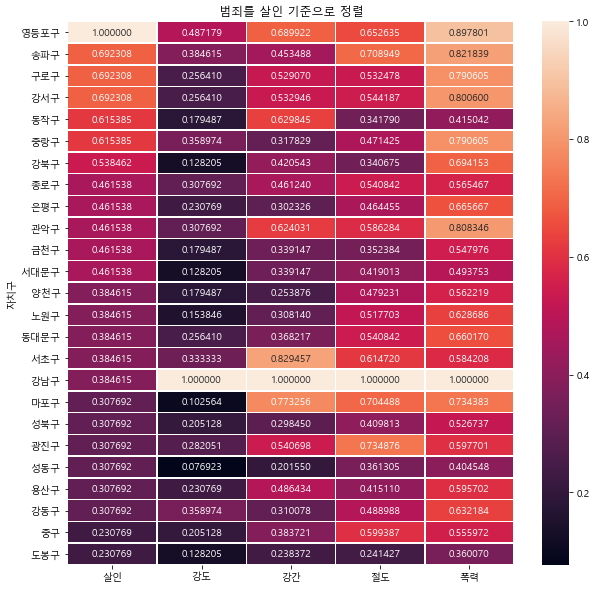

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_count_norm.sort_values(by='살인',ascending=False),annot=True,fmt='f',linewidths=.5)
plt.title('범죄를 살인 기준으로 정렬')
plt.show()

In [22]:
crime_ratio = crime_count_norm.div(df['인구수'],axis=0) * 100000

In [24]:
crime_ratio['전체발생비율'] = crime_ratio.mean(axis=1)

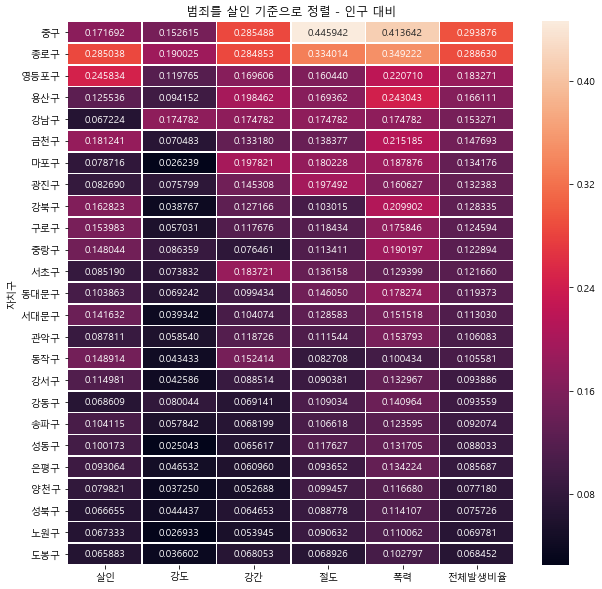

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_ratio.sort_values(by='전체발생비율',ascending=False),annot=True,fmt='f',linewidths=.5)
plt.title('범죄를 살인 기준으로 정렬 - 인구 대비')
plt.show()